# EDA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import statsmodels
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import seaborn as sns
sns.set()

In [10]:
# read dataframe
df = pd.read_csv('game_data_final_features.csv')

In [11]:
# drop usless column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 46 columns):
Unnamed: 0.1               2983 non-null int64
categories                 2955 non-null object
contains_ads               2983 non-null float64
downloads_and_revenue      2983 non-null object
has_iap                    2983 non-null int64
installs                   1531 non-null float64
most_popular_country       2983 non-null object
name                       2983 non-null object
android                    2983 non-null float64
price                      2983 non-null float64
publisher_country          2495 non-null object
publisher_name             2982 non-null object
rating                     2983 non-null float64
rating_breakdown           2983 non-null object
rating_count               2983 non-null float64
revenue                    2983 non-null int64
downloads                  2983 non-null int64
one_star                   2983 non-null int64
two_star                   2

In [5]:
df.head()

,categories,contains_ads,downloads_and_revenue,has_iap,installs,most_popular_country,name,android,price,publisher_country,...,categories_Other,categories_Puzzle,categories_Role Playing,categories_Simulation,categories_Sports,categories_Strategy,revenue_club,revenue_clubx10,log_revenue,Free_Pay
0,Adventure,0.0,"{'downloads': '< 5k', 'revenue': '$9k', 'reven...",0,1000.0,US,KIDS,1.0,2.99,NaN,...,0,0,0,0,0,0,1,1,9.104980,1
1,Casual,1.0,"{'downloads': '5m', 'revenue': '< $5k', 'reven...",0,10000000.0,BR,Mini Block Craft,1.0,0.00,US,...,0,0,0,0,0,0,1,1,8.517193,0
2,Adventure,0.0,"{'downloads': '< 5k', 'revenue': '$10k', 'reve...",0,1000.0,US,Wonder Boy: The Dragon's Trap,1.0,9.99,France,...,0,0,0,0,0,0,2,100,9.210340,1
3,Strategy,0.0,"{'downloads': '< 5k', 'revenue': '< $5k', 'rev...",0,1000.0,US,Zombie Night Terror,1.0,7.99,France,...,0,0,0,0,0,1,1,1,8.517193,1
4,Role Playing,1.0,"{'downloads': '200k', 'revenue': '$500k', 'rev...",1,1000000.0,TH,TALION,1.0,0.00,South Korea,...,0,0,1,0,0,0,3,1000,13.122363,0


In [5]:
df2 = df.copy()

In [6]:
df2.shape

(3110, 45)

In [7]:
# make a new dataframe with dummies
df3 = pd.concat([df2, pd.get_dummies(df2.categories, prefix="categories")],axis=1, sort=False)

In [8]:
df3.columns

Index(['categories', 'contains_ads', 'downloads_and_revenue', 'has_iap',
       'installs', 'most_popular_country', 'name', 'android', 'price',
       'publisher_country', 'publisher_name', 'rating', 'rating_breakdown',
       'rating_count', 'revenue', 'downloads', 'one_star', 'two_star',
       'three_star', 'four_star', 'five_star', 'ios', 'one_star_1',
       'three_star_3', 'four_star_4', 'five_star_5', 'two_star_2',
       'overall_rating', 'categories_Action', 'categories_Adventure',
       'categories_Arcade', 'categories_Board', 'categories_Card',
       'categories_Casino', 'categories_Casual', 'categories_Other',
       'categories_Puzzle', 'categories_Role Playing', 'categories_Simulation',
       'categories_Sports', 'categories_Strategy', 'revenue_club',
       'revenue_clubx10', 'log_revenue', 'Free_Pay', 'categories_Action',
       'categories_Adventure', 'categories_Arcade', 'categories_Board',
       'categories_Card', 'categories_Casino', 'categories_Casual',
       

In [16]:
X = df.loc[:,['contains_ads', 'has_iap',
       'android', 'ios', 'Free_Pay','rating_count', 'downloads',
       'categories_Action','categories_Adventure', 'categories_Arcade', 'categories_Board',
       'categories_Card', 'categories_Casino', 'categories_Casual',
       'categories_Other', 'categories_Puzzle', 'categories_Role Playing',
       'categories_Simulation', 'categories_Sports', 'categories_Strategy', 
       'overall_rating', 'one_star','two_star','three_star', 'four_star', 'five_star']]
y = df.loc[:,['revenue']]

In [17]:
game_model = sm.OLS(y, X)

results = game_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     56.35
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          3.42e-228
Time:                        02:41:03   Log-Likelihood:                -47249.
No. Observations:                2983   AIC:                         9.455e+04
Df Residuals:                    2957   BIC:                         9.471e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
contains_ads            -6.104e+05   1.11e+05     -5.519      0.000   -8.27e+05   -3.94e+05
has_iap                  1.778e+05   9.98e+04      1.783      0.075   -1.78e+04    3.73e+05
android                  2.405e+05   4.95e+05      0.486      0.627   -7.29e+05    1.21e+06
ios                      3.255e+05   4.87e+05      0.669      0.504   -6.29e+05    1.28e+06
Free_Pay                -6.083e+05   1.01e+05     -6.045      0.000   -8.06e+05   -4.11e+05
rating_count                5.1755      0.413     12.537      0.000       4.366       5.985
downloads                   0.0608      0.021      2.867      0.004       0.019       0.102
categories_Action        4.686e+05   3.66e+05      1.280      0.201   -2.49e+05    1.19e+06
categories_Adventure     6.687e+05   3.72e+05      1.799      0.072      -6e+04     1.4e+06
categories_Arcade         2.06e+05   3.66e+05      0.563      0.574   -5.12e+05    9.24e+05
categories_Board          3.01e+05   4.01e+05      0.751      0.453   -4.85e+05    1.09e+06
categories_Card          6.272e+05   3.98e+05      1.574      0.115   -1.54e+05    1.41e+06
categories_Casino        1.183e+06   3.96e+05      2.984      0.003    4.06e+05    1.96e+06
categories_Casual        8.982e+05   3.98e+05      2.258      0.024    1.18e+05    1.68e+06
categories_Other         1.246e+05   3.68e+05      0.339      0.735   -5.96e+05    8.45e+05
categories_Puzzle         6.44e+05   3.69e+05      1.744      0.081   -8.02e+04    1.37e+06
categories_Role Playing   7.91e+05   3.67e+05      2.157      0.031    7.19e+04    1.51e+06
categories_Simulation    4.158e+05   3.67e+05      1.134      0.257   -3.03e+05    1.13e+06
categories_Sports        1.774e+05   3.93e+05      0.451      0.652   -5.94e+05    9.48e+05
categories_Strategy      9.536e+05   3.69e+05      2.585      0.010     2.3e+05    1.68e+06
overall_rating          -5.573e+04   8.36e+04     -0.667      0.505    -2.2e+05    1.08e+05
one_star                   18.4241      1.614     11.418      0.000      15.260      21.588
two_star                  -20.4439     10.453     -1.956      0.051     -40.940       0.052
three_star                -49.6777      7.953     -6.246      0.000     -65.272     -34.083
four_star                  12.2690      1.953      6.283      0.000       8.440      16.098
five_star                  -5.6751      0.433    -13.095      0.000      -6.525      -4.825
==============================================================================
Omnibus:                     3671.097   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           771198.877
Skew:                           6.401   Prob(JB):                         0.00
Kurtosis:                      80.723   Cond. No.                     1.00e+08
====================

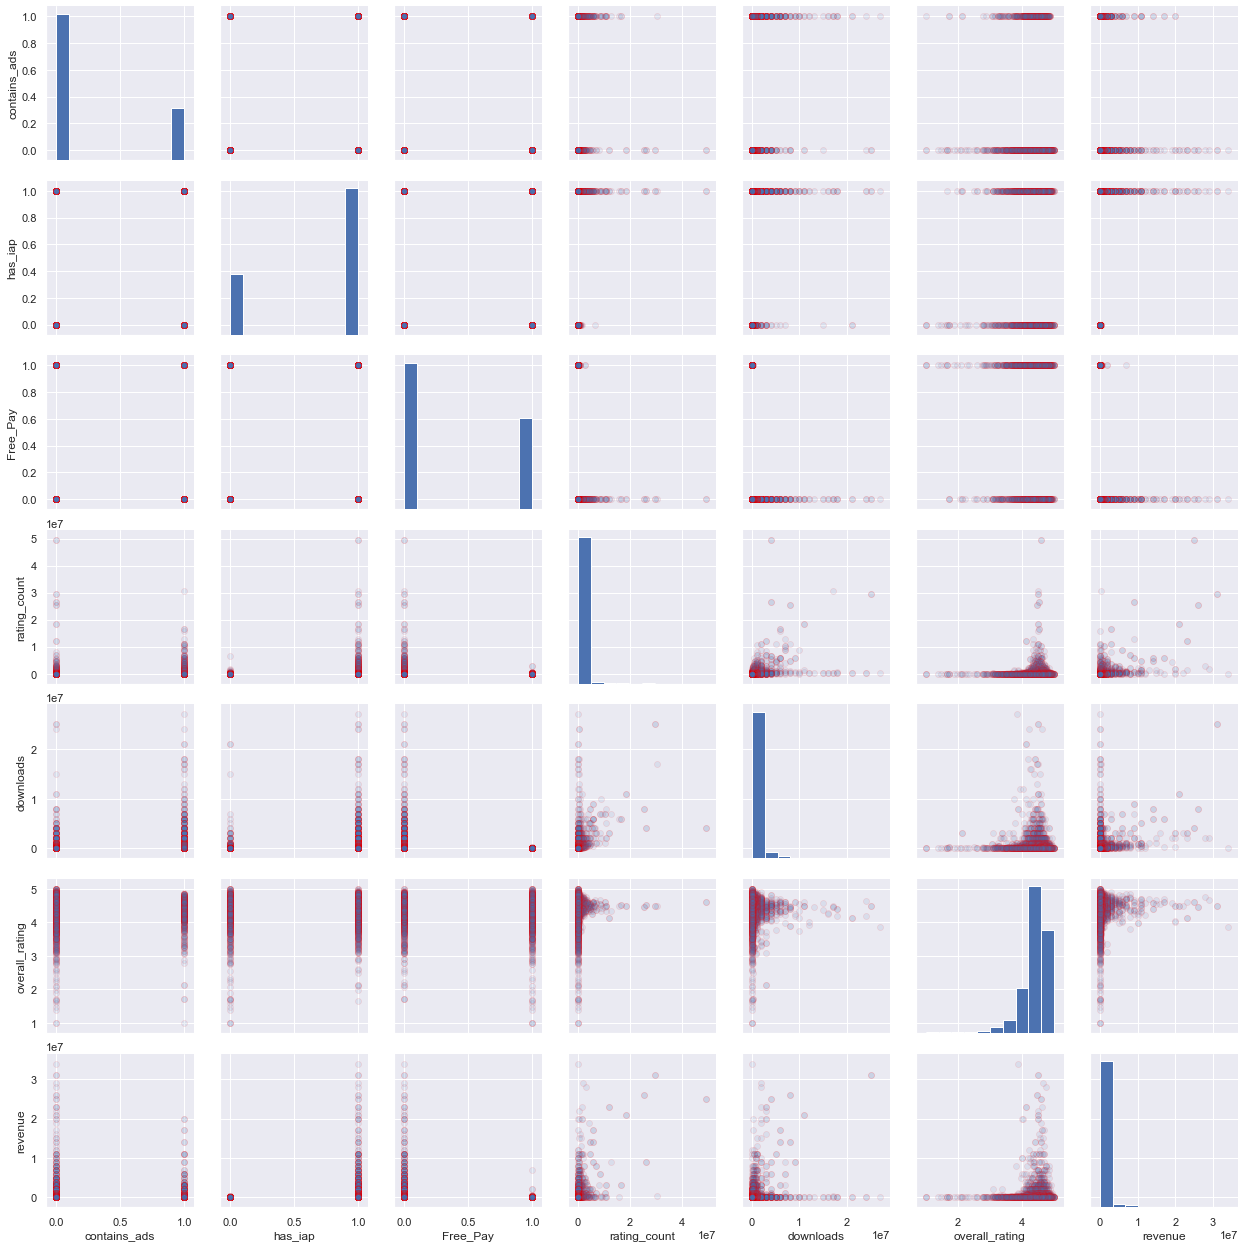

In [20]:
sns.pairplot(df.loc[:,['contains_ads', 'has_iap', 'Free_Pay','rating_count', 'downloads','overall_rating','revenue']], plot_kws=dict(alpha=.1, edgecolor='red'))

### Revenue looks so right skewed and heavy.